# Comparing U.S. House results with various factors by district

<span style='font-family:Hoefler Text'> We will be plotting and statistically testing various factors 
to see their correlation<br> to the partisan results of U.S House of Representatives elections at the 
district<br> level. We will also see how these things change over time.

In [1]:
def is_significant(linear_model, variable, significance=0.05):
    if linear_model.pvalues.loc[variable] < significance:
        return True
    return False

def get_linestyle(linear_model, variable, significance=0.05):
    x = is_significant(linear_model, variable, significance)
    if x==True:
        return("-")
    return("--")

#get_linestyle(lm_multi,'percent hispanic',0.001)

## Import Data

<span style='font-family:Baskerville'> Election results data from: 

<span style='font-family:Baskerville'> MIT Election Data and Science Lab, 2017, "U.S. House 1976–2020", https://doi.org/10.7910/DVN/IG0UN2, Harvard Dataverse, V11, UNF:6:ry6R0P1KRBhWkIfZzKiM8A== [fileUNF]

<span style='font-family:Baskerville'> Demographic information data from:

<span style='font-family:Baskerville'> [data.census.gov](https://data.census.gov)

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'Georgia',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

#import election results data
full_results = pd.read_csv('data/1976-2020-house.csv', index_col=['state_fips', 'district'])
relevant_results = full_results.loc[:,['year','state','party','candidatevotes','totalvotes',]]
relevant_results = relevant_results.loc[relevant_results['year']==2018]
# change MN DFL to D---Not that relevant
relevant_results['party'] = relevant_results['party'].str.replace('DEMOCRATIC-FARMER-LABOR','DEMOCRAT')



## Arrange Election Results to a workable format

In [3]:

output=pd.DataFrame(columns=['state, district','winner','proportion'])
#loop through and get the winner and proportion to the winner for each (proportion related to the top two. Third place and below votes discounted)
for i in relevant_results.index:
    holder = relevant_results.loc[i,]
    this_district=holder.reset_index() #new df with the full results of each district and a uniqe index for each candidate there
    votes = {"R":0,"D":0,"Other":0} # dict to store top three
    for j in this_district.index: # loop through subset df to get the result for each party or tp in our dict
        if(this_district.at[j,'party']=="REPUBLICAN"):
            votes["R"] = this_district.at[j,'candidatevotes']
        elif(this_district.at[j,'party']=="DEMOCRAT"):
            votes["D"] = this_district.at[j, 'candidatevotes']
        else:
            x = this_district.at[j,'candidatevotes'] # here check if the non D or R candidate got more votes than the one we have.
            if x>votes["Other"]:                        #we are only taking top three but there may be more than 1 tp
                votes["Other"] = x

    top_two = [votes[max(votes, key=votes.get)],sorted(votes.values())[-2]]     #list with just the top two candidates (almost certainly D and R)
    #print(f"Both: {top_two} Winner: {top_two[0]} Sum: {np.sum(top_two)} Percentage: {top_two[0]/np.sum(top_two)}") #print for diagnostic
    relevant_results.loc[i,"Win %"] = top_two[0]/np.sum(top_two) # new col with proportion to winner
    relevant_results.loc[i,"Winner"] = max(votes, key=votes.get) # new col with winner


relevant_results.to_csv('output.csv')

winners = relevant_results.loc[:,['Win %','Winner']]
winners = winners.reset_index()
winners = winners.drop_duplicates()
winners = winners.reset_index(drop=True) 
for i in winners.index:
    if winners.loc[i,"Winner"] == "R":
        winners.loc[i,"Dem Margin"] = ((winners.loc[i,"Win %"]*100) - 50)*(-1)
    else:
        winners.loc[i,"Dem Margin"] = ((winners.loc[i,"Win %"]*100) - 50)
winners.to_csv('data/winners.csv')

## Arrange Demographics to a workable format

i.e. a % white per district

In [11]:
# import race demographic data
race_demos = pd.read_excel('data/demographics_DP05.xlsx', index_col=[0,1])
nec_demos = race_demos.loc[:,:]

nec_demos = nec_demos.drop(('Geography',), axis=0)
nec_demos = nec_demos.sort_index()
nec_demos = nec_demos.reset_index()
nec_demos.to_csv("data/demographics.csv")
nec_demos

/var/folders/_x/zhpkxy714pz_sqp0xngnykbm0000gn/T/ipykernel_67831/1254561444.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  nec_demos = nec_demos.drop(('Geography',), axis=0)


,state,congressional district,NAME,DP05_0001E,DP05_0001EA,DP05_0001M,DP05_0001MA,DP05_0001PE,DP05_0001PEA,DP05_0001PM,...,DP05_0089M,DP05_0089MA,DP05_0089PE,DP05_0089PEA,DP05_0089PM,DP05_0089PMA,GEO_ID,NAME.1,state.1,congressional district.1
0,1,1.0,"Congressional District 1 (116th Congress), Ala...",715346,NaN,3366.0,NaN,715346,NaN,-888888888.0,...,2175.0,NaN,52.9,NaN,0.3,NaN,5001600US0101,"Congressional District 1 (116th Congress), Ala...",1,1.0
1,1,2.0,"Congressional District 2 (116th Congress), Ala...",678122,NaN,7200.0,NaN,678122,NaN,-888888888.0,...,3369.0,NaN,52.7,NaN,0.4,NaN,5001600US0102,"Congressional District 2 (116th Congress), Ala...",1,2.0
2,1,3.0,"Congressional District 3 (116th Congress), Ala...",708409,NaN,5269.0,NaN,708409,NaN,-888888888.0,...,2387.0,NaN,52,NaN,0.3,NaN,5001600US0103,"Congressional District 3 (116th Congress), Ala...",1,3.0
3,1,4.0,"Congressional District 4 (116th Congress), Ala...",686297,NaN,5436.0,NaN,686297,NaN,-888888888.0,...,2859.0,NaN,51.9,NaN,0.3,NaN,5001600US0104,"Congressional District 4 (116th Congress), Ala...",1,4.0
4,1,5.0,"Congressional District 5 (116th Congress), Ala...",725634,NaN,447.0,NaN,725634,NaN,-888888888.0,...,1610.0,NaN,51.5,NaN,0.2,NaN,5001600US0105,"Congressional District 5 (116th Congress), Ala...",1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,55,6.0,"Congressional District 6 (116th Congress), Wis...",714886,NaN,3008.0,NaN,714886,NaN,-888888888.0,...,1769.0,NaN,49.8,NaN,0.2,NaN,5001600US5506,"Congressional District 6 (116th Congress), Wis...",55,6.0
433,55,7.0,"Congressional District 7 (116th Congress), Wis...",710420,NaN,3463.0,NaN,710420,NaN,-888888888.0,...,1494.0,NaN,49.9,NaN,0.2,NaN,5001600US5507,"Congressional District 7 (116th Congress), Wis...",55,7.0
434,55,8.0,"Congressional District 8 (116th Congress), Wis...",735997,NaN,1553.0,NaN,735997,NaN,-888888888.0,...,1756.0,NaN,50.6,NaN,0.2,NaN,5001600US5508,"Congressional District 8 (116th Congress), Wis...",55,8.0
435,56,0.0,Congressional District (at Large) (116th Congr...,577737,NaN,-555555555.0,*****,577737,NaN,-888888888.0,...,2112.0,NaN,49.3,NaN,0.4,NaN,5001600US5600,Congressional District (at Large) (116th Congr...,56,0.0


## Table of partisanship and demographics

In [82]:
results=0
demogs=0
both=0
results = pd.read_csv('data/winners.csv')
demogs = pd.read_csv('data/demographics.csv')
results = results.rename(columns={"Unnamed: 0":"oldind","state_fips":"state","district":"district","Win %":"Win %","Winner":"Winner","Dem Margin":"Dem Margin"})
demogs = demogs.rename(columns={"Unnamed: 0":"oldind","state_fips":"state","congressional district":"district","DP05_0037PE":"percent white","DP05_0038PE":"percent black","DP05_0039PE":"percent indian","DP05_0044PE":"percent asian", "DP05_0071PE":"percent hispanic","DP05_0004E":"sex ratio","DP05_0023PE":"percent over 62", "DP05_0010PE":"percent 25-34"})
demogs = demogs.loc[demogs['district']!=98]
demogs = demogs.reset_index(drop=True)
tables = [results,demogs]
both = pd.concat(tables, axis=1); both = both.drop("oldind",axis=1)


both.to_csv("look.csv")

## Multivariate regression

In [83]:
import statsmodels.api as sm
hondo = sm.add_constant(both.loc[:,["percent white","percent black","percent hispanic","percent indian","percent asian", "sex ratio", "percent over 62", "percent 25-34"]])
lm_multi = sm.OLS(both.loc[:,"Dem Margin"],exog=hondo).fit()
pred = lm_multi.predict(hondo)
print(lm_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             Dem Margin   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     63.72
Date:                Sun, 07 May 2023   Prob (F-statistic):           4.37e-68
Time:                        12:34:46   Log-Likelihood:                -1749.8
No. Observations:                 435   AIC:                             3518.
Df Residuals:                     426   BIC:                             3554.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              104.4485     30.006  

## Finally, plot it

                            OLS Regression Results                            
Dep. Variable:             Dem Margin   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     299.5
Date:                Sun, 07 May 2023   Prob (F-statistic):           2.22e-51
Time:                        12:40:06   Log-Likelihood:                -1806.6
No. Observations:                 435   AIC:                             3617.
Df Residuals:                     433   BIC:                             3625.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            59.3302      3.207     18.501

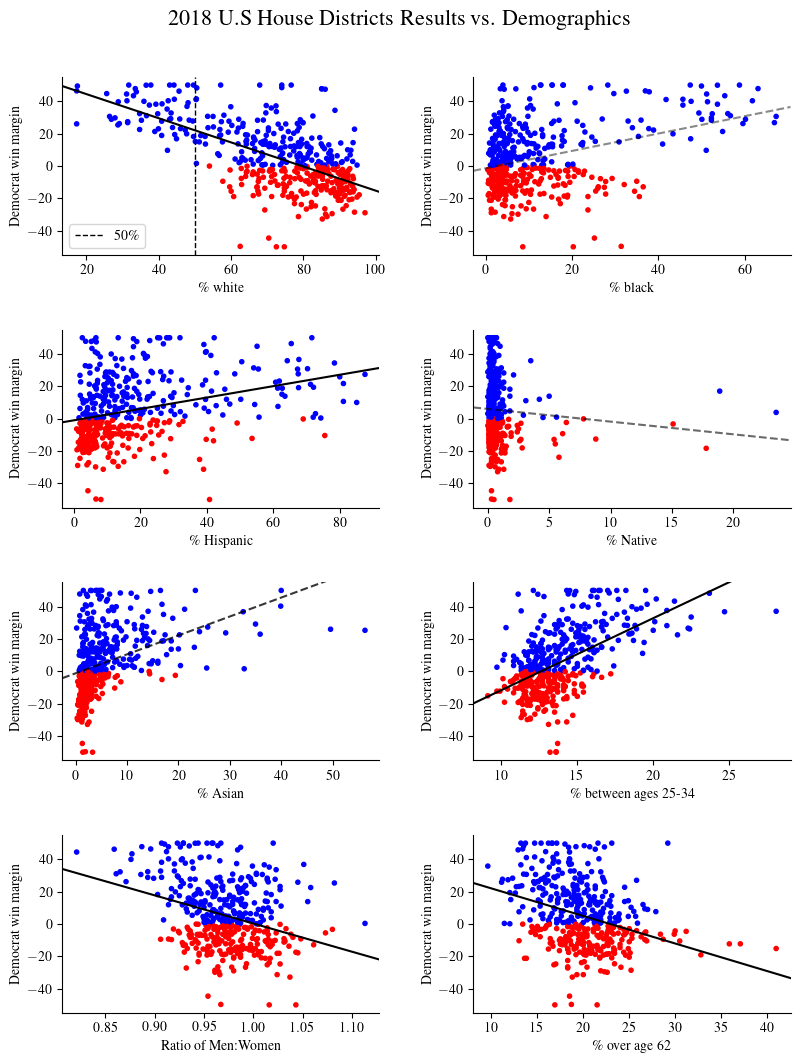

In [93]:
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

fig,ax = plt.subplots(nrows=4,ncols=2,figsize=(8.5,11))


colors={"R":'red',"D":'blue',"Other":'green'}


ax[0,0].scatter(both.loc[:,"percent white"], both.loc[:,"Dem Margin"], marker='.', c=both.loc[:,"Winner"].map(colors))
ax[0,0].set_xlabel("\% white")
ax[0,0].set_ylabel("Democrat win margin")

mit_konstant = sm.add_constant(both.loc[:,"percent white"])
lm_white = sm.OLS(both.loc[:,"Dem Margin"],exog=mit_konstant)
lm_white = lm_white.fit()
pred = lm_white.predict(mit_konstant)
print(lm_white.summary())

#ax[0,0].plot(both.loc[:,"percent white"].to_numpy()[:,None],pred,color="black",linestyle=get_linestyle(lm_multi,'percent white'), alpha=(1-(lm_multi.pvalues.loc['percent white'])))
abline_plot(model_results=lm_white, ax=ax[0,0], color="black",linestyle=get_linestyle(lm_multi,'percent white'),alpha=(1-(lm_multi.pvalues.loc['percent white'])))
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].axvline(x = 50, color = 'black', label = f"50\%", linestyle='--', linewidth=1)
ax[0,0].legend()



ax[0,1].scatter(both.loc[:,"percent black"], both.loc[:,"Dem Margin"], marker='.', c=both.loc[:,"Winner"].map(colors))
ax[0,1].set_xlabel("\% black")
ax[0,1].set_ylabel("Democrat win margin")

mit_konstant = sm.add_constant(both.loc[:,"percent black"])
lm_black = sm.OLS(both.loc[:,"Dem Margin"],exog=mit_konstant).fit()
pred = lm_black.predict(mit_konstant)
print(lm_black.summary())


#ax[0,1].plot(both.loc[:,"percent black"].to_numpy()[:,None],pred,color="black",linestyle=get_linestyle(lm_multi,'percent black'), alpha=(1-(lm_multi.pvalues.loc['percent black'])))
abline_plot(model_results=lm_black, ax=ax[0,1], color="black",linestyle=get_linestyle(lm_multi,'percent black'),alpha=(1-(lm_multi.pvalues.loc['percent black'])))

ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)



ax[1,1].scatter(both.loc[:,"percent indian"], both.loc[:,"Dem Margin"], marker='.', c=both.loc[:,"Winner"].map(colors))
ax[1,1].set_xlabel("\% Native")
ax[1,1].set_ylabel("Democrat win margin")

mit_konstant = sm.add_constant(both.loc[:,"percent indian"])
lm_native = sm.OLS(both.loc[:,"Dem Margin"],exog=mit_konstant).fit()
pred = lm_native.predict(mit_konstant)
print(lm_native.summary())

abline_plot(model_results=lm_native, ax=ax[1,1], color="black",linestyle=get_linestyle(lm_multi,'percent indian'),alpha=(1-(lm_multi.pvalues.loc['percent indian'])))
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)


ax[2,0].scatter(both.loc[:,"percent asian"], both.loc[:,"Dem Margin"], marker='.', c=both.loc[:,"Winner"].map(colors))
ax[2,0].set_xlabel("\% Asian")
ax[2,0].set_ylabel("Democrat win margin")

mit_konstant = sm.add_constant(both.loc[:,"percent asian"])
lm_asian = sm.OLS(both.loc[:,"Dem Margin"],exog=mit_konstant).fit()
pred = lm_asian.predict(mit_konstant)
print(lm_asian.summary())

abline_plot(model_results=lm_asian, ax=ax[2,0], color="black",linestyle=get_linestyle(lm_multi,'percent asian'),alpha=(1-(lm_multi.pvalues.loc['percent asian'])))

ax[2,0].spines['top'].set_visible(False)
ax[2,0].spines['right'].set_visible(False)


ax[1,0].scatter(both.loc[:,"percent hispanic"], both.loc[:,"Dem Margin"], marker='.', c=both.loc[:,"Winner"].map(colors))
ax[1,0].set_xlabel("\% Hispanic")
ax[1,0].set_ylabel("Democrat win margin")

mit_konstant = sm.add_constant(both.loc[:,"percent hispanic"])
lm_hispanic = sm.OLS(both.loc[:,"Dem Margin"],exog=mit_konstant).fit()
pred = lm_hispanic.predict(mit_konstant)
print(lm_hispanic.summary())

abline_plot(model_results=lm_hispanic, ax=ax[1,0], color="black",linestyle=get_linestyle(lm_multi,'percent hispanic'),alpha=(1-(lm_multi.pvalues.loc['percent hispanic'])))

ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)

normalize = both.loc[:,"sex ratio"]/100
ax[3,0].scatter(normalize, both.loc[:,"Dem Margin"], marker='.', c=both.loc[:,"Winner"].map(colors))
ax[3,0].set_xlabel("Ratio of Men:Women")
ax[3,0].set_ylabel("Democrat win margin")

mit_konstant = sm.add_constant(normalize)
lm_sex = sm.OLS(both.loc[:,"Dem Margin"],exog=mit_konstant).fit()
pred = lm_sex.predict(mit_konstant)
print(lm_sex.summary())

abline_plot(model_results=lm_sex, ax=ax[3,0], color="black",linestyle=get_linestyle(lm_multi,'sex ratio'),alpha=(1-(lm_multi.pvalues.loc['sex ratio'])))

ax[3,0].spines['top'].set_visible(False)
ax[3,0].spines['right'].set_visible(False)


ax[3,1].scatter(both.loc[:,"percent over 62"], both.loc[:,"Dem Margin"], marker='.', c=both.loc[:,"Winner"].map(colors))
ax[3,1].set_xlabel("\% over age 62")
ax[3,1].set_ylabel("Democrat win margin")

mit_konstant = sm.add_constant(both.loc[:,"percent over 62"])
lm_age = sm.OLS(both.loc[:,"Dem Margin"],exog=mit_konstant).fit()
pred = lm_age.predict(mit_konstant)
print(lm_age.summary())

abline_plot(model_results=lm_age, ax=ax[3,1], color="black",linestyle=get_linestyle(lm_multi,'percent over 62'),alpha=(1-(lm_multi.pvalues.loc['percent over 62'])))

ax[3,1].spines['top'].set_visible(False)
ax[3,1].spines['right'].set_visible(False)


ax[2,1].scatter(both.loc[:,"percent 25-34"], both.loc[:,"Dem Margin"], marker='.', c=both.loc[:,"Winner"].map(colors))
ax[2,1].set_xlabel("\% between ages 25-34")
ax[2,1].set_ylabel("Democrat win margin")

mit_konstant = sm.add_constant(both.loc[:,"percent 25-34"])
lm_young = sm.OLS(both.loc[:,"Dem Margin"],exog=mit_konstant).fit()
pred = lm_young.predict(mit_konstant)
print(lm_young.summary())

abline_plot(model_results=lm_young, ax=ax[2,1], color="black",linestyle=get_linestyle(lm_multi,'percent 25-34'),alpha=(1-(lm_multi.pvalues.loc['percent 25-34'])))

ax[2,1].spines['top'].set_visible(False)
ax[2,1].spines['right'].set_visible(False)

fig.suptitle("2018 U.S House Districts Results vs. Demographics", fontsize=16)

fig.tight_layout(pad=2.5)

fig.savefig("Democrat margin vs race.pdf",transparent=True,)

## Lets do some more years besides 2018

/var/folders/_x/zhpkxy714pz_sqp0xngnykbm0000gn/T/ipykernel_10090/3831949176.py:36: RuntimeWarning: invalid value encountered in scalar divide
  relevant_results.loc[i,"Win %"] = top_two[0]/np.sum(top_two) # new col with proportion to winner
/var/folders/_x/zhpkxy714pz_sqp0xngnykbm0000gn/T/ipykernel_10090/3831949176.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  demographics.columns = demographics.columns.str.replace("\[",'')
/var/folders/_x/zhpkxy714pz_sqp0xngnykbm0000gn/T/ipykernel_10090/3831949176.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  demographics.columns = demographics.columns.str.replace("\]",'')


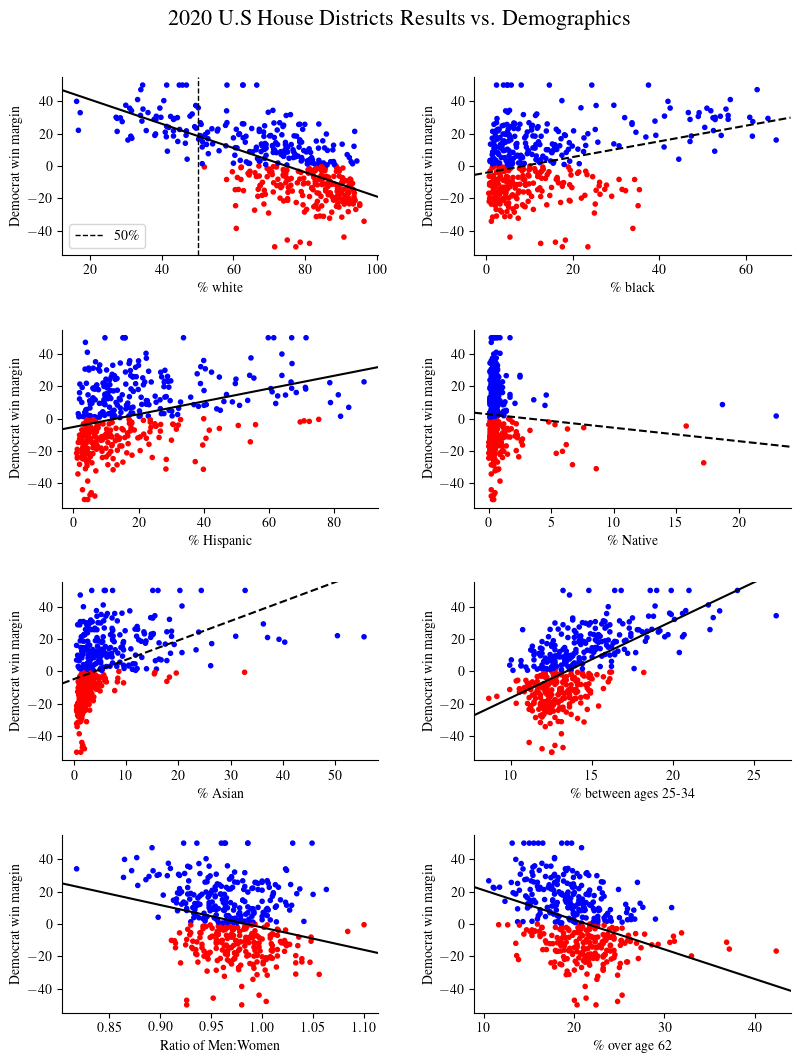

In [14]:
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np


link = "https://api.census.gov/data/2018/acs/acs1/profile?get=group(DP05)&for=congressional%20district:*"

#import election results data
full_results = pd.read_csv('data/1976-2020-house.csv', index_col=['state_fips', 'district'])
year = 2020 # adjust the year variable to try different years. However, some years have different variable names in the census so you will need to change that. Also, for 2020, there is no census data, so you need to add a -1 to use 2019 data.

relevant_results = full_results.loc[:,['year','state','party','candidatevotes','totalvotes',]]
relevant_results = relevant_results.loc[relevant_results['year']==year]
relevant_results = relevant_results.loc[relevant_results['state']!="DISTRICT OF COLUMBIA"]
output=pd.DataFrame(columns=['state, district','winner','proportion'])
#loop through and get the winner and proportion to the winner for each (proportion related to the top two. Third place and below votes discounted)
for i in relevant_results.index:
    holder = relevant_results.loc[i,]
    this_district=holder.reset_index() #new df with the full results of each district and a uniqe index for each candidate there
    votes = {"R":0,"D":0,"Other":0} # dict to store top three
    for j in this_district.index: # loop through subset df to get the result for each party or tp in our dict
        if(this_district.at[j,'party']=="REPUBLICAN"):
            votes["R"] = this_district.at[j,'candidatevotes']
        elif(this_district.at[j,'party']=="DEMOCRAT"):
            votes["D"] = this_district.at[j, 'candidatevotes']
        else:
            x = this_district.at[j,'candidatevotes'] # here check if the non D or R candidate got more votes than the one we have.
            if x>votes["Other"]:                        #we are only taking top three but there may be more than 1 tp
                votes["Other"] = x

    top_two = [votes[max(votes, key=votes.get)],sorted(votes.values())[-2]]     #list with just the top two candidates (almost certainly D and R)
    #print(f"Both: {top_two} Winner: {top_two[0]} Sum: {np.sum(top_two)} Percentage: {top_two[0]/np.sum(top_two)}") #print for diagnostic
    relevant_results.loc[i,"Win %"] = top_two[0]/np.sum(top_two) # new col with proportion to winner
    relevant_results.loc[i,"Winner"] = max(votes, key=votes.get) # new col with winner
    winners = relevant_results.loc[:,['Win %','Winner']]
winners = winners.reset_index()
winners = winners.drop_duplicates()
winners = winners.reset_index(drop=True) 
for i in winners.index:
    if winners.loc[i,"Winner"] == "R":
        winners.loc[i,"Dem Margin"] = ((winners.loc[i,"Win %"]*100) - 50)*(-1)
    else:
        winners.loc[i,"Dem Margin"] = ((winners.loc[i,"Win %"]*100) - 50)

demographics = pd.read_csv(f"https://api.census.gov/data/{year-1}/acs/acs1/profile?get=group(DP05)&for=congressional%20district:*")
demographics = demographics.replace({"\"":'',"\[":'',"\]":''}, regex=True)
demographics.columns = demographics.columns.str.replace("\"",'')
demographics.columns = demographics.columns.str.replace("\[",'')
demographics.columns = demographics.columns.str.replace("\]",'')
demographics = demographics.set_index(['state','congressional district'])
demographics = demographics.sort_index()
demographics = demographics.reset_index()

winners = winners.rename(columns={"Unnamed: 0":"oldind","state_fips":"state","district":"district","Win %":"Win %","Winner":"Winner","Dem Margin":"Dem Margin"})
demographics = demographics.rename(columns={"Unnamed: 0":"oldind","state_fips":"state","congressional district":"district","DP05_0037PE":"percent white","DP05_0038PE":"percent black","DP05_0039PE":"percent indian","DP05_0044PE":"percent asian", "DP05_0071PE":"percent hispanic","DP05_0004E":"sex ratio","DP05_0023PE":"percent over 62", "DP05_0010PE":"percent 25-34"})
#demographics = demographics.rename(columns={"Unnamed: 0":"oldind","state_fips":"state","congressional district":"district","DP05_0032PE":"percent white","DP05_0033PE":"percent black","DP05_0034PE":"percent indian","DP05_0039PE":"percent asian", "DP05_0066PE":"percent hispanic","DP05_0017E":"sex ratio","DP05_0020PE":"percent over 62", "DP05_0009PE":"percent 25-34"})
demographics = demographics.loc[demographics['district'].astype(int)<55]
demographics = demographics.reset_index(drop=True) 
tables = [winners,demographics]
both = pd.concat(tables, axis=1) #both = both.drop("oldind",axis=1)
both.to_csv('2022check.csv')
demographics.to_csv('2020demo.csv')
winners.to_csv('2020win.csv')

import statsmodels.api as sm
hondo = sm.add_constant(both.loc[:,["percent white","percent black","percent hispanic","percent indian","percent asian", "sex ratio", "percent over 62", "percent 25-34"]])
lm_multi = sm.OLS(both.loc[:,"Dem Margin"],exog=hondo, missing='drop')
lm_multi = lm_multi.fit()

mit_konstant = sm.add_constant(both.loc[:,"percent white"])
lm_white = sm.OLS(both.loc[:,"Dem Margin"],exog=mit_konstant, missing='drop').fit()

mit_konstant = sm.add_constant(both.loc[:,"percent black"])
lm_black = sm.OLS(both.loc[:,"Dem Margin"],exog=mit_konstant, missing='drop').fit()

mit_konstant = sm.add_constant(both.loc[:,"percent indian"])
lm_native = sm.OLS(both.loc[:,"Dem Margin"],exog=mit_konstant, missing='drop').fit()

mit_konstant = sm.add_constant(both.loc[:,"percent asian"])
lm_asian = sm.OLS(both.loc[:,"Dem Margin"],exog=mit_konstant, missing='drop').fit()

mit_konstant = sm.add_constant(both.loc[:,"percent hispanic"])
lm_hispanic = sm.OLS(both.loc[:,"Dem Margin"],exog=mit_konstant, missing='drop').fit()

normalize = both.loc[:,"sex ratio"]/100
mit_konstant = sm.add_constant(normalize)
lm_sex = sm.OLS(both.loc[:,"Dem Margin"],exog=mit_konstant, missing='drop').fit()

mit_konstant = sm.add_constant(both.loc[:,"percent over 62"])
lm_age = sm.OLS(both.loc[:,"Dem Margin"],exog=mit_konstant, missing='drop').fit()

mit_konstant = sm.add_constant(both.loc[:,"percent 25-34"])
lm_young = sm.OLS(both.loc[:,"Dem Margin"],exog=mit_konstant, missing='drop').fit()

with open(f"{year}_regression_summary.txt",'w') as f:
    f.write("\n\nMultiple Linear Regression:\n")
    f.write(str(lm_multi.summary()))
    f.write("\n\nWhite only:\n")
    f.write(str(lm_white.summary()))
    f.write("\n\nBlack only:\n")
    f.write(str(lm_black.summary()))
    f.write("\n\nHispanic only:\n")
    f.write(str(lm_hispanic.summary()))
    f.write("\n\nNative only:\n")
    f.write(str(lm_native.summary()))
    f.write("\n\nAsian only:\n")
    f.write(str(lm_asian.summary()))
    f.write("\n\nGender only:\n")
    f.write(str(lm_sex.summary()))
    f.write("\n\nSeniors only:\n")
    f.write(str(lm_age.summary()))
    f.write("\n\nYoung Adults only:\n")
    f.write(str(lm_young.summary()))
fig,ax = plt.subplots(nrows=4,ncols=2,figsize=(8.5,11))
colors={"R":'red',"D":'blue',"Other":'green'}
#white
ax[0,0].scatter(both.loc[:,"percent white"], both.loc[:,"Dem Margin"], marker='.', c=both.loc[:,"Winner"].map(colors))
ax[0,0].set_xlabel("\% white")
ax[0,0].set_ylabel("Democrat win margin")
abline_plot(model_results=lm_white, ax=ax[0,0], color="black",linestyle=get_linestyle(lm_multi,'percent white'))#,alpha=(1-(lm_multi.pvalues.loc['percent white'])))
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].axvline(x = 50, color = 'black', label = f"50\%", linestyle='--', linewidth=1)
ax[0,0].legend(loc='lower left')
#black
ax[0,1].scatter(both.loc[:,"percent black"], both.loc[:,"Dem Margin"], marker='.', c=both.loc[:,"Winner"].map(colors))
ax[0,1].set_xlabel("\% black")
ax[0,1].set_ylabel("Democrat win margin")
abline_plot(model_results=lm_black, ax=ax[0,1], color="black",linestyle=get_linestyle(lm_multi,'percent black'),)#alpha=(1-(lm_multi.pvalues.loc['percent black'])))
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
#hispanic
ax[1,0].scatter(both.loc[:,"percent hispanic"], both.loc[:,"Dem Margin"], marker='.', c=both.loc[:,"Winner"].map(colors))
ax[1,0].set_xlabel("\% Hispanic")
ax[1,0].set_ylabel("Democrat win margin")
abline_plot(model_results=lm_hispanic, ax=ax[1,0], color="black",linestyle=get_linestyle(lm_multi,'percent hispanic'),)#alpha=(1-(lm_multi.pvalues.loc['percent hispanic'])))
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)
#indian
ax[1,1].scatter(both.loc[:,"percent indian"], both.loc[:,"Dem Margin"], marker='.', c=both.loc[:,"Winner"].map(colors))
ax[1,1].set_xlabel("\% Native")
ax[1,1].set_ylabel("Democrat win margin")
abline_plot(model_results=lm_native, ax=ax[1,1], color="black",linestyle=get_linestyle(lm_multi,'percent indian'),)#alpha=(1-(lm_multi.pvalues.loc['percent indian'])))
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
#asian
ax[2,0].scatter(both.loc[:,"percent asian"], both.loc[:,"Dem Margin"], marker='.', c=both.loc[:,"Winner"].map(colors))
ax[2,0].set_xlabel("\% Asian")
ax[2,0].set_ylabel("Democrat win margin")
abline_plot(model_results=lm_asian, ax=ax[2,0], color="black",linestyle=get_linestyle(lm_multi,'percent asian'),)#alpha=(1-(lm_multi.pvalues.loc['percent asian'])))
ax[2,0].spines['top'].set_visible(False)
ax[2,0].spines['right'].set_visible(False)
#young adults
ax[2,1].scatter(both.loc[:,"percent 25-34"], both.loc[:,"Dem Margin"], marker='.', c=both.loc[:,"Winner"].map(colors))
ax[2,1].set_xlabel("\% between ages 25-34")
ax[2,1].set_ylabel("Democrat win margin")
abline_plot(model_results=lm_young, ax=ax[2,1], color="black",linestyle=get_linestyle(lm_multi,'percent 25-34'),)#alpha=(1-(lm_multi.pvalues.loc['percent 25-34'])))
ax[2,1].spines['top'].set_visible(False)
ax[2,1].spines['right'].set_visible(False)
#gender
#normalize = both.loc[:,"sex ratio"]#/100
ax[3,0].scatter(normalize, both.loc[:,"Dem Margin"], marker='.', c=both.loc[:,"Winner"].map(colors))
ax[3,0].set_xlabel("Ratio of Men:Women")
ax[3,0].set_ylabel("Democrat win margin")
abline_plot(model_results=lm_sex, ax=ax[3,0], color="black",linestyle=get_linestyle(lm_multi,'sex ratio'),)#alpha=(1-(lm_multi.pvalues.loc['sex ratio'])))
ax[3,0].spines['top'].set_visible(False)
ax[3,0].spines['right'].set_visible(False)
#seniors
ax[3,1].scatter(both.loc[:,"percent over 62"], both.loc[:,"Dem Margin"], marker='.', c=both.loc[:,"Winner"].map(colors))
ax[3,1].set_xlabel("\% over age 62")
ax[3,1].set_ylabel("Democrat win margin")
abline_plot(model_results=lm_age, ax=ax[3,1], color="black",linestyle=get_linestyle(lm_multi,'percent over 62'),)#alpha=(1-(lm_multi.pvalues.loc['percent over 62'])))
ax[3,1].spines['top'].set_visible(False)
ax[3,1].spines['right'].set_visible(False)

fig.suptitle(f"{year} U.S House Districts Results vs. Demographics", fontsize=16)
fig.tight_layout(pad=2.5)
fig.savefig(f"plots/{year}_plots.pdf",transparent=True,)

